## 1.4　ニューラルネットワークで問題を解く

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys.path.append('../input/deeplearningfromscratch2master/deep-learning-from-scratch-2-master')

In [3]:
from dataset import spiral
from common.layers import Affine, Sigmoid, SoftmaxWithLoss
from common.optimizer import SGD
from common.trainer import Trainer

### 1.4.1　スパイラル・データセット

In [4]:
x, t = spiral.load_data()
print('x', x.shape)
print('t', t.shape)

x (300, 2)
t (300, 3)


In [5]:
print('x')
print(x[:5])
print('t')
print(t[:5])

x
[[-0.          0.        ]
 [-0.00097699  0.00995216]
 [ 0.00512668  0.01933176]
 [-0.00038604  0.02999752]
 [ 0.01425097  0.03737526]]
t
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


### 1.4.2　ニューラルネットワークの実装

入力層が 1 つ、中間層が 1 つ、出力層が 1 つのニューラルネットワークを実装する。

In [6]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)
        
        self.layers = [Affine(W1, b1), Sigmoid(), Affine(W2, b2)]
        self.loss_layer = SoftmaxWithLoss()
        
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
        
    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
        
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

### 1.4.3　学習用のソースコード

In [7]:
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

入力層が 2 層、中間層が 10 層、出力層が 3 層のニューラルネットワークを作成する。

In [8]:
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

In [9]:
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

print(data_size)
print(batch_size)

300
30


1 `epoch` が 300 に対して、`batch_size` は 30 のため、`max_iter` は 10 になる。<br>
`max_epoch` は 300 なので、データを 300 周したことになる。

In [10]:
for epoch in range(max_epoch):
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
        
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| epoch %d | iter %d / %d | loss %.2f' % (epoch+1, iters+1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

| epoch 1 | iter 10 / 10 | loss 1.13
| epoch 2 | iter 10 / 10 | loss 1.13
| epoch 3 | iter 10 / 10 | loss 1.12
| epoch 4 | iter 10 / 10 | loss 1.12
| epoch 5 | iter 10 / 10 | loss 1.11
| epoch 6 | iter 10 / 10 | loss 1.14
| epoch 7 | iter 10 / 10 | loss 1.16
| epoch 8 | iter 10 / 10 | loss 1.11
| epoch 9 | iter 10 / 10 | loss 1.12
| epoch 10 | iter 10 / 10 | loss 1.13
| epoch 11 | iter 10 / 10 | loss 1.12
| epoch 12 | iter 10 / 10 | loss 1.11
| epoch 13 | iter 10 / 10 | loss 1.09
| epoch 14 | iter 10 / 10 | loss 1.08
| epoch 15 | iter 10 / 10 | loss 1.04
| epoch 16 | iter 10 / 10 | loss 1.03
| epoch 17 | iter 10 / 10 | loss 0.96
| epoch 18 | iter 10 / 10 | loss 0.92
| epoch 19 | iter 10 / 10 | loss 0.92
| epoch 20 | iter 10 / 10 | loss 0.87
| epoch 21 | iter 10 / 10 | loss 0.85
| epoch 22 | iter 10 / 10 | loss 0.82
| epoch 23 | iter 10 / 10 | loss 0.79
| epoch 24 | iter 10 / 10 | loss 0.78
| epoch 25 | iter 10 / 10 | loss 0.82
| epoch 26 | iter 10 / 10 | loss 0.78
| epoch 27 | iter 10 

In [11]:
print(5 // 3)
print(5 % 3)
print(np.random.permutation(10))
print(np.random.permutation(10))

1
2
[5 1 8 4 9 7 0 2 6 3]
[3 4 2 7 8 5 6 0 9 1]


### 1.4.4　Trainer クラス

In [12]:
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

In [13]:
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

| epoch 1 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 2 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 3 |  iter 1 / 10 | time 0[s] | loss 1.13
| epoch 4 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 5 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 6 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 7 |  iter 1 / 10 | time 0[s] | loss 1.14
| epoch 8 |  iter 1 / 10 | time 0[s] | loss 1.16
| epoch 9 |  iter 1 / 10 | time 0[s] | loss 1.11
| epoch 10 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 11 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 12 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 13 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 14 |  iter 1 / 10 | time 0[s] | loss 1.09
| epoch 15 |  iter 1 / 10 | time 0[s] | loss 1.08
| epoch 16 |  iter 1 / 10 | time 0[s] | loss 1.04
| epoch 17 |  iter 1 / 10 | time 0[s] | loss 1.03
| epoch 18 |  iter 1 / 10 | time 0[s] | loss 0.94
| epoch 19 |  iter 1 / 10 | time 0[s] | loss 0.92
| epoch 20 |  iter 1 / 10 | time 0[s] | loss 0.92
| epoch 2

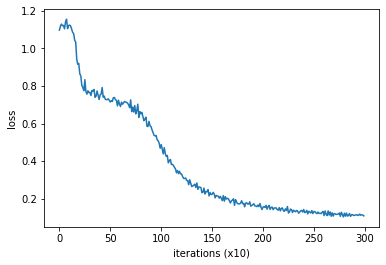

In [14]:
trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()